In [145]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from scipy.stats import probplot

In [146]:
def tea_time(BG, df):
    tea_time = BG.standard_t(df, size=200)
    for i, value in enumerate(tea_time):
        print(f"{i+1}: {value}")


tea_time(np.random.default_rng(), 5)

1: 1.3988674134215693
2: 1.5613301383545706
3: 1.2256237413821993
4: 1.4462985511670217
5: 0.8029760674814668
6: -0.669165700039489
7: 1.1736405070128146
8: 0.1813335017202253
9: 1.9388996626132127
10: -0.8887526303222946
11: 1.8824531092998928
12: 0.23421298860187412
13: -0.6952483990902498
14: -0.5351503669481733
15: 0.5400205556976756
16: 1.2655142291540171
17: -0.06520927376597767
18: -0.6129493528467029
19: -0.1493742574718331
20: -0.7221599563633212
21: -0.7693778571727706
22: -1.615257704404566
23: 0.5499825188514078
24: 1.3457434228564098
25: -1.3915719043328951
26: 0.6120637847825957
27: 0.18759742260685672
28: 1.9005056259236972
29: 1.0695278779736965
30: 0.991052750293916
31: 1.5412821294838521
32: 1.317475189233979
33: -0.791341104380692
34: -0.22144301134960268
35: -1.7192255962288652
36: -0.30324673228989674
37: -0.6638624930288605
38: 0.4927052979656518
39: -0.8792250418749844
40: 0.3120854702088932
41: 1.2940367949890699
42: 2.321845906381583
43: -0.769158760803716
44: 

In [147]:
def BGAR(bg, a, r=bool):
    return bg.choice(a, size=len(a), replace=r)


BGAR1 = BGAR(np.random.default_rng(), [1, 2, 3, 4, 5], True)
BGAR2 = BGAR(np.random.default_rng(), [1, 2, 3, 4, 5], False)

print(f"Random Draws with Replacement: {BGAR1}")
print(f"Random Draws without Replacement: {BGAR2}")

Random Draws with Replacement: [5 3 2 2 4]
Random Draws without Replacement: [4 2 3 1 5]


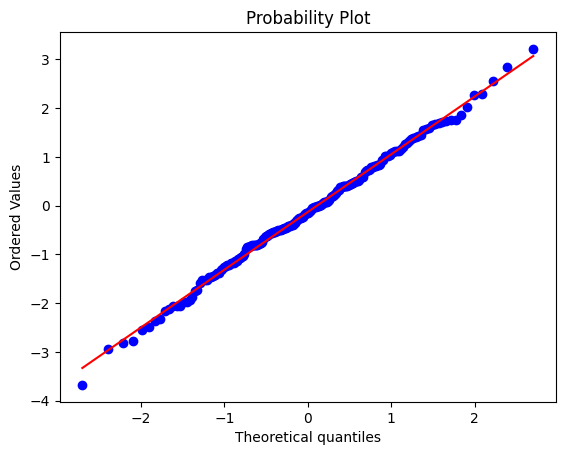

In [148]:
def pplot(s):
    probplot(s, dist="norm", plot=plt)
    plt.show()


pplot(np.random.default_rng().standard_t(5, size=200))

Not actually keeping these names lol